In [15]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [16]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files)
raw_stats = []
for file in stat_files:
    raw_stats.append(pickle.load(open(file, 'rb')))

['agent_code/my_agent/Training_data/statistics/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics/004_statistics.txt']


In [17]:
scores, survived, reward, time, steps = {}, {}, {}, {}, {}

statistics = {}

N_gen = 100*int(stat_files[0][45]) + 10*int(stat_files[0][46]) + int(stat_files[0][47])

for gen in raw_stats:
    gen_score, gen_survived, gen_reward, gen_time, gen_steps = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

    for ep in gen[0]:
        gen_score = np.append(gen_score, ep['score'])
        #gen_survived = np.append(gen_survived, ep['alive'])
        if ep['steps'] < 400:
            gen_survived = np.append(gen_survived, False)
        gen_reward = np.append(gen_reward, ep['reward'])
        gen_time = np.append(gen_time, ep['mean_time'])
        gen_steps = np.append(gen_steps, ep['steps'])
    
    scores[N_gen] = gen_score
    survived[N_gen] = gen_survived
    reward[N_gen] = gen_reward
    time[N_gen] = gen_time
    steps[N_gen] = gen_steps
    N_gen += 1



[1, 2, 3, 4] [0.0015, 0.0001, 0.0008, 0.0001]


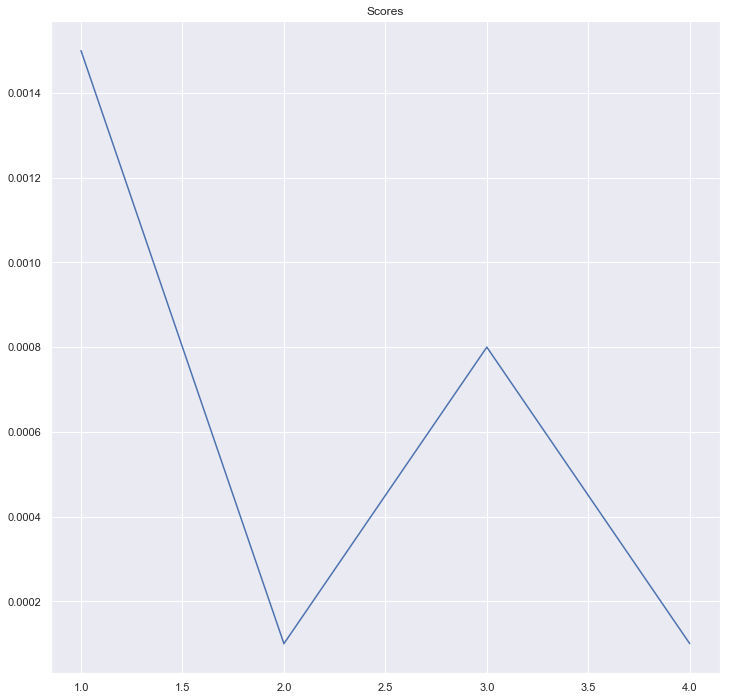

In [18]:
plt.figure(figsize=(12,12))
plt.title('Scores')
y_avg_scores = []
x_gen = []
for gen, sc in scores.items():
    x_gen.append(gen)
    y_avg_scores.append(np.mean(sc))
print(x_gen, y_avg_scores)
plt.plot(x_gen, y_avg_scores, label='gen_1')
plt.show()

[1, 2, 3, 4] [0.0, 0.0, 0.0, 0.0]


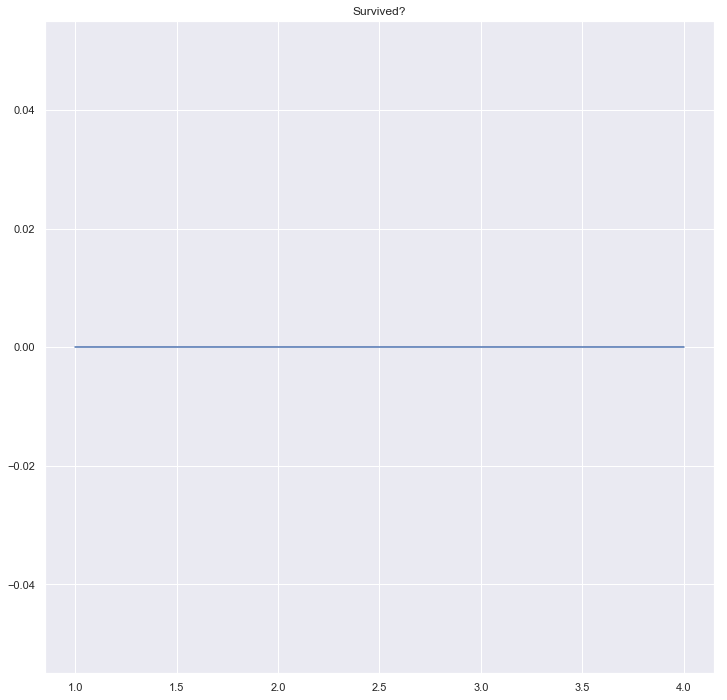

In [19]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Survived?')
y_avg_survived = []
x_gen = []
for gen, sc in survived.items():
    x_gen.append(gen)
    y_avg_survived.append(np.mean(sc))
print(x_gen, y_avg_survived)
plt.plot(x_gen, y_avg_survived, label='gen_1')
plt.show()

[1, 2, 3, 4] [-5326.4979, -4575.3975, -4758.5038, -4536.3825]


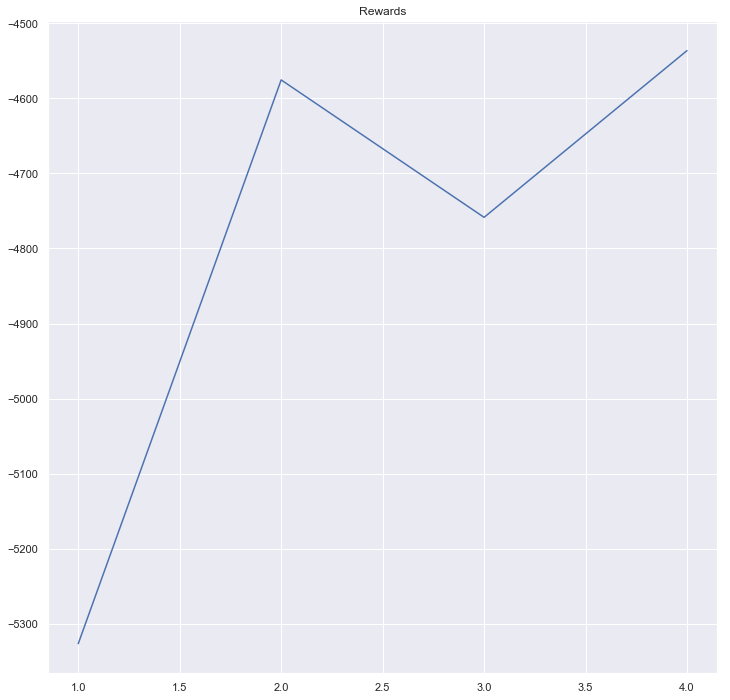

In [20]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Rewards')
y_avg_rewards = []
x_gen = []
for gen, rew in reward.items():
    x_gen.append(gen)
    y_avg_rewards.append(np.mean(rew))
print(x_gen, y_avg_rewards)
plt.plot(x_gen, y_avg_rewards, label='gen_1')
plt.show()

[1, 2, 3, 4] [14.1614, 6.3899, 10.0219, 6.4393]


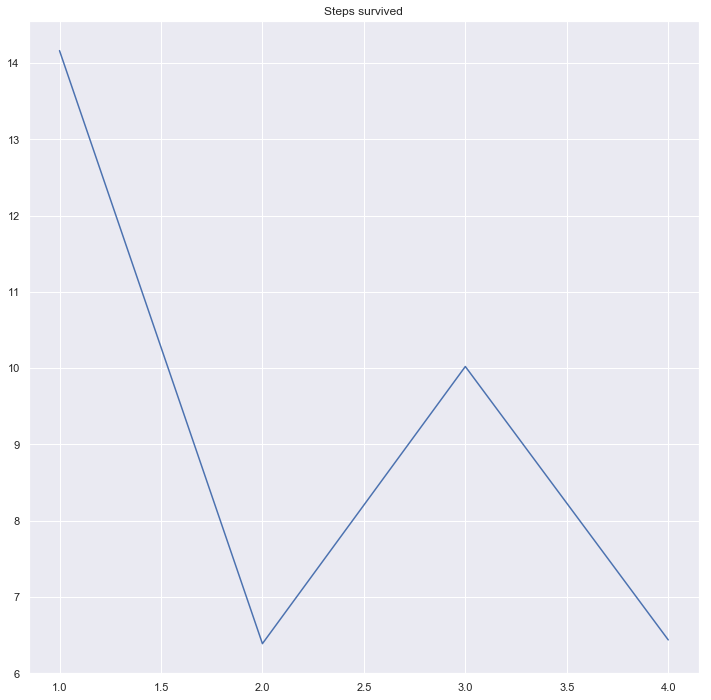

In [21]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Steps survived')
y_avg_steps = []
x_gen = []
for gen, step in steps.items():
    x_gen.append(gen)
    y_avg_steps.append(np.mean(step))
print(x_gen, y_avg_steps)
plt.plot(x_gen, y_avg_steps, label='gen_1')
plt.show()

In [26]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/trees')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
#print(stat_files)
raw_stats = []
for file in range(len(stat_files)-6, len(stat_files)):
    raw_stats.append(pickle.load(open(file, 'rb')))
#print(stat_files[-6])

OSError: [WinError 6] The handle is invalid

In [37]:
import numpy as np

tester = np.arange(5)
gammas = 0.9**np.arange(tester.shape[0])
output = []
for y in range(tester.shape[0]):
    output.append(np.sum(tester[y:]*gammas[:tester.shape[0]-y]))

print (tester)
print (output)
print (0.9+0.9**2*2+0.9**3*3+0.9**4*4)

[0 1 2 3 4]
[7.3314, 8.146, 7.94, 6.6, 4.0]
7.3314
